In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
train_data = pd.read_csv('train.csv', nrows=4e6)
raw_ids_all = train_data["Id"]
raw_ids = raw_ids_all.unique()

In [3]:
train_data.shape

(4000000, 24)

In [4]:
len(raw_ids)

344299

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     int64  
 1   minutes_past           int64  
 2   radardist_km           float64
 3   Ref                    float64
 4   Ref_5x5_10th           float64
 5   Ref_5x5_50th           float64
 6   Ref_5x5_90th           float64
 7   RefComposite           float64
 8   RefComposite_5x5_10th  float64
 9   RefComposite_5x5_50th  float64
 10  RefComposite_5x5_90th  float64
 11  RhoHV                  float64
 12  RhoHV_5x5_10th         float64
 13  RhoHV_5x5_50th         float64
 14  RhoHV_5x5_90th         float64
 15  Zdr                    float64
 16  Zdr_5x5_10th           float64
 17  Zdr_5x5_50th           float64
 18  Zdr_5x5_90th           float64
 19  Kdp                    float64
 20  Kdp_5x5_10th           float64
 21  Kdp_5x5_50th           float64
 22  Kdp_5x5_90th      

In [6]:
train_data.describe()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
count,4.000000e+06,4.000000e+06,4.000000e+06,1.889100e+06,1.582608e+06,1.892016e+06,2.233064e+06,2.004566e+06,1.729464e+06,2.003984e+06,2.319580e+06,1.454055e+06,1.225807e+06,1.454378e+06,1.728579e+06,1.454055e+06,1.225807e+06,1.454378e+06,1.728579e+06,1.239646e+06,1.025215e+06,1.241105e+06,1.486013e+06,4.000000e+06
mean,1.736903e+05,2.949933e+01,1.104781e+01,2.322470e+01,2.022038e+01,2.291314e+01,2.623384e+01,2.502333e+01,2.245765e+01,2.473629e+01,2.773016e+01,9.732448e-01,9.207162e-01,9.747135e-01,1.014827e+00,5.390516e-01,-6.936456e-01,3.476980e-01,2.050309e+00,2.807346e-02,-3.427414e+00,-4.526659e-01,4.013970e+00,1.102606e+02
std,9.914775e+04,1.731868e+01,4.222652e+00,1.037574e+01,9.212803e+00,1.007524e+01,1.115220e+01,1.070953e+01,9.715129e+00,1.045201e+01,1.151992e+01,8.923426e-02,1.241112e-01,7.386994e-02,4.792623e-02,1.500426e+00,1.006046e+00,9.438947e-01,1.660226e+00,3.813226e+00,2.760417e+00,2.235520e+00,4.081664e+00,5.577478e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-2.900000e+01,-3.150000e+01,-3.150000e+01,-2.650000e+01,-2.650000e+01,-2.900000e+01,-2.500000e+01,-2.300000e+01,2.083333e-01,2.083333e-01,2.083333e-01,2.083333e-01,-7.875000e+00,-7.875000e+00,-7.875000e+00,-7.875000e+00,-6.804000e+01,-6.091000e+01,-7.029000e+01,-9.112000e+01,1.000000e-02
25%,8.781700e+04,1.400000e+01,9.000000e+00,1.650000e+01,1.450000e+01,1.650000e+01,1.850000e+01,1.800000e+01,1.600000e+01,1.750000e+01,1.950000e+01,9.716667e-01,9.150000e-01,9.750000e-01,9.983333e-01,-1.875000e-01,-1.062500e+00,-6.250000e-02,1.062500e+00,-1.410004e+00,-4.520004e+00,-7.100067e-01,1.819992e+00,2.540001e-01
50%,1.742080e+05,2.900000e+01,1.100000e+01,2.300000e+01,2.000000e+01,2.300000e+01,2.600000e+01,2.450000e+01,2.250000e+01,2.450000e+01,2.750000e+01,9.916667e-01,9.616666e-01,9.916667e-01,1.008333e+00,3.750000e-01,-6.250000e-01,2.500000e-01,1.687500e+00,0.000000e+00,-2.820007e+00,0.000000e+00,3.500000e+00,1.016000e+00
75%,2.595700e+05,4.400000e+01,1.400000e+01,3.000000e+01,2.600000e+01,2.950000e+01,3.400000e+01,3.200000e+01,2.900000e+01,3.150000e+01,3.550000e+01,1.001667e+00,9.850000e-01,9.983333e-01,1.051667e+00,1.062500e+00,-1.875000e-01,6.875000e-01,2.562500e+00,1.729996e+00,-1.760010e+00,3.499908e-01,5.629990e+00,3.810002e+00
max,3.442990e+05,5.900000e+01,2.100000e+01,7.100000e+01,6.050000e+01,6.900000e+01,7.250000e+01,8.300000e+01,6.600000e+01,7.100000e+01,9.150000e+01,1.051667e+00,1.051667e+00,1.051667e+00,1.051667e+00,7.937500e+00,7.937500e+00,7.937500e+00,7.937500e+00,1.215200e+02,2.470001e+00,1.070999e+01,1.446000e+02,3.301773e+04


Convert each column data type to floats of size 32

In [7]:
for column in train_data.columns:
    train_data[column] = train_data[column].astype(np.float32)
train_data['Id'] = train_data['Id'].astype(np.int32)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     int32  
 1   minutes_past           float32
 2   radardist_km           float32
 3   Ref                    float32
 4   Ref_5x5_10th           float32
 5   Ref_5x5_50th           float32
 6   Ref_5x5_90th           float32
 7   RefComposite           float32
 8   RefComposite_5x5_10th  float32
 9   RefComposite_5x5_50th  float32
 10  RefComposite_5x5_90th  float32
 11  RhoHV                  float32
 12  RhoHV_5x5_10th         float32
 13  RhoHV_5x5_50th         float32
 14  RhoHV_5x5_90th         float32
 15  Zdr                    float32
 16  Zdr_5x5_10th           float32
 17  Zdr_5x5_50th           float32
 18  Zdr_5x5_90th           float32
 19  Kdp                    float32
 20  Kdp_5x5_10th           float32
 21  Kdp_5x5_50th           float32
 22  Kdp_5x5_90th      

Remove only ids with NaNs in the Ref column

In [9]:
np.sum(np.isnan(train_data['Ref']))

2110900

In [10]:
train_raw_tmp = train_data[~np.isnan(train_data.Ref)]
print(train_raw_tmp.shape)

(1889100, 24)


In [11]:
raw_ids_tmp = train_raw_tmp["Id"].unique()

In [12]:
len(raw_ids_tmp)

215248

Check if raw_ids are in raw_tmps

In [13]:
train_new = train_data[np.in1d(raw_ids_all, raw_ids_tmp)]

In [14]:
train_new.shape

(2685403, 24)

In [15]:
train_new = train_new.fillna(0.0)
train_new = train_new.reset_index(drop=True)

Define and exclude outliers from the training set, i.e where expected rainfall is too small

In [16]:
threshold = 80
train_new_group = train_new.groupby('Id')
#get the mean arcross all ID's
mean_ID = pd.DataFrame(train_new_group['Expected'].mean())

In [17]:
mean_ID.describe()

,Expected
count,215248.000000
mean,23.699896
std,248.168945
min,0.010000
25%,0.254000
50%,1.270001
75%,3.556002
max,33017.730469


In [18]:
meaningful_ids = np.array(mean_ID[mean_ID['Expected'] < threshold].index)

In [19]:
len(meaningful_ids)

210676

In [20]:
meaningful_ids[:10]

array([ 2,  4,  7,  8, 10, 11, 12, 14, 15, 17])

In [21]:
train_final = train_new[np.in1d(train_new.Id, meaningful_ids)]

Delete other variables up unitl now

In [22]:
del train_data, train_new, train_new_group,train_raw_tmp

Define a function that pads seris up to target length 19

In [23]:
def pad_series(X, target_len=19):
    seq_len = X.shape[0]
    pad_size = target_len-seq_len
    if (pad_size > 0):
        X = np.pad(X, ((0,pad_size), (0,0)), 'constant', constant_values=0.)
    return X, seq_len

In [24]:
data_pd_gp = train_final.groupby("Id")
data_size = len(data_pd_gp)

In [25]:
data_size

210676

travese each id in groupy by object, grabbing the necessary inputs from each id, and pad accordingly

In [26]:
input_width = 19

X_train = np.empty((data_size, input_width, 22))
seq_lengths = np.zeros(data_size)
y_train = np.zeros(data_size)

i = 0
for _,group in data_pd_gp:
    group_array = np.array(group)
    X, seq_length = pad_series(group_array[:,1:23], target_len=input_width)
    y = group_array[0,23]
    X_train[i, :, :] = X[:,:]
    seq_lengths[i] = seq_length
    y_train[i] = y
    i += 1

In [27]:
X_train.shape, y_train.shape

((210676, 19, 22), (210676,))

(array([3.4000e+01, 1.0000e+01, 9.7800e+03, 3.9680e+03, 2.3000e+03,
        5.0278e+04, 7.9913e+04, 4.0056e+04, 1.5409e+04, 8.9280e+03]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <a list of 10 Patch objects>)

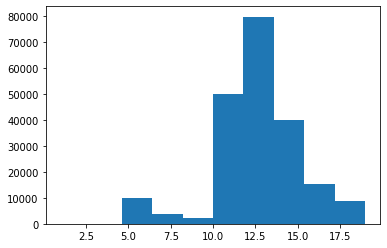

In [28]:
plt.hist(seq_lengths)

# Create the model

In [29]:
from keras.layers import RNN, Input, Dense, LSTM, AveragePooling1D, TimeDistributed, Bidirectional, Flatten
from keras.models import Model

Using TensorFlow backend.


In [30]:
def get_model_lite(shape=(19,22)):
    inp = Input(shape)
    x = Bidirectional(LSTM(64, return_sequences=True))(inp)
    x = TimeDistributed(Dense(64))(x)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = TimeDistributed(Dense(1))(x)
    x = AveragePooling1D(pool_size=2)(x)
    x = Flatten()(x)
    x = Dense(1)(x)

    model = Model(inp, x)
    return model

In [32]:
m16 = get_model_lite((19,22))

In [33]:
m16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 19, 22)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 19, 128)           44544     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 19, 64)            8256      
_________________________________________________________________
bidirectional_4 (Bidirection (None, 19, 256)           197632    
_________________________________________________________________
time_distributed_4 (TimeDist (None, 19, 1)             257       
_________________________________________________________________
average_pooling1d_2 (Average (None, 9, 1)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9)                 0         
__________

In [34]:
from keras.optimizers import SGD

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
m16.compile(sgd, loss='mae')


In [35]:
m16.fit(X_train, y_train,batch_size=32, epochs=1, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





210676/210676 [==============================] - 1469s 7ms/step - loss: 2.6786


## Load file from google colab

In [38]:
read_dictionary = np.load('rain_model1_loss.npy',allow_pickle='TRUE').item()

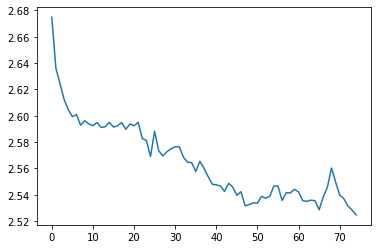

In [41]:
plt.plot(read_dictionary['loss'])
plt.show()